In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

hechos = pd.read_parquet('../archivos/datos_limpios/hechos.parquet')
victimas = pd.read_parquet('../archivos/datos_limpios/victimas.parquet')

In [9]:
hechos.head(3)

,Id,N_victimas,Fecha,Año,Mes,Hora,Tipo_de_calle,Calle,Cruce,Comuna,Longitud,Latitud,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,4.0,AVENIDA,PIEDRA BUENA AV.,1,8,-58.47533969,-34.68757022,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,1.0,GRAL PAZ,"PAZ, GRAL. AV.",1,9,-58.50877521,-34.66977709,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,7.0,AVENIDA,ENTRE RIOS AV.,0,1,-58.39040293,-34.63189362,MOTO,AUTO


In [10]:
hechos.describe(include='all')

,Id,N_victimas,Fecha,Año,Mes,Hora,Tipo_de_calle,Calle,Cruce,Comuna,Longitud,Latitud,Victima,Acusado
count,695,695.000000,695,695.000000,695.000000,694.000000,695,695,695.000000,695.000000,695,695,686,673
unique,695,NaN,NaN,NaN,NaN,NaN,4,278,NaN,NaN,605,605,9,9
top,2021-0097,NaN,NaN,NaN,NaN,NaN,AVENIDA,"PAZ, GRAL. AV.",NaN,NaN,.,.,MOTO,AUTO
freq,1,NaN,NaN,NaN,NaN,NaN,429,57,NaN,NaN,11,11,295,204
mean,NaN,1.030216,2018-09-15 04:10:42.302158336,2018.191367,6.686331,11.645533,NaN,NaN,0.755396,7.435971,NaN,NaN,NaN,NaN
min,NaN,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,1.000000,2017-04-03 00:00:00,2017.000000,4.000000,6.000000,NaN,NaN,1.000000,4.000000,NaN,NaN,NaN,NaN
50%,NaN,1.000000,2018-07-14 00:00:00,2018.000000,7.000000,11.000000,NaN,NaN,1.000000,8.000000,NaN,NaN,NaN,NaN
75%,NaN,1.000000,2020-01-04 12:00:00,2020.000000,10.000000,17.000000,NaN,NaN,1.000000,11.000000,NaN,NaN,NaN,NaN
max,NaN,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,23.000000,NaN,NaN,1.000000,15.000000,NaN,NaN,NaN,NaN


**Verifico que los valores N_victimas sean del tipo int para poder realizar una suma por cada año**

In [11]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 0 to 695
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             695 non-null    object        
 1   N_victimas     695 non-null    int64         
 2   Fecha          695 non-null    datetime64[ns]
 3   Año            695 non-null    int64         
 4   Mes            695 non-null    int64         
 5   Hora           694 non-null    float64       
 6   Tipo_de_calle  695 non-null    object        
 7   Calle          695 non-null    object        
 8   Cruce          695 non-null    int64         
 9   Comuna         695 non-null    int64         
 10  Longitud       695 non-null    object        
 11  Latitud        695 non-null    object        
 12  Victima        686 non-null    object        
 13  Acusado        673 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 81.4+ KB


quiero ir verificando por diferentes franjas de tiempo: anual, mensual y diario

In [12]:
victimas_por_año = hechos[['N_victimas','Año']]
victimas_por_año = victimas_por_año.groupby('Año').sum().reset_index()
victimas_por_año.head()

,Año,N_victimas
0,2016,145
1,2017,140
2,2018,149
3,2019,104
4,2020,81


+ Grafico la cantidad de muertes por año, chequeo si en 2019 y 2020 hay un descenso, debido al covid y las restricciones de circulacion

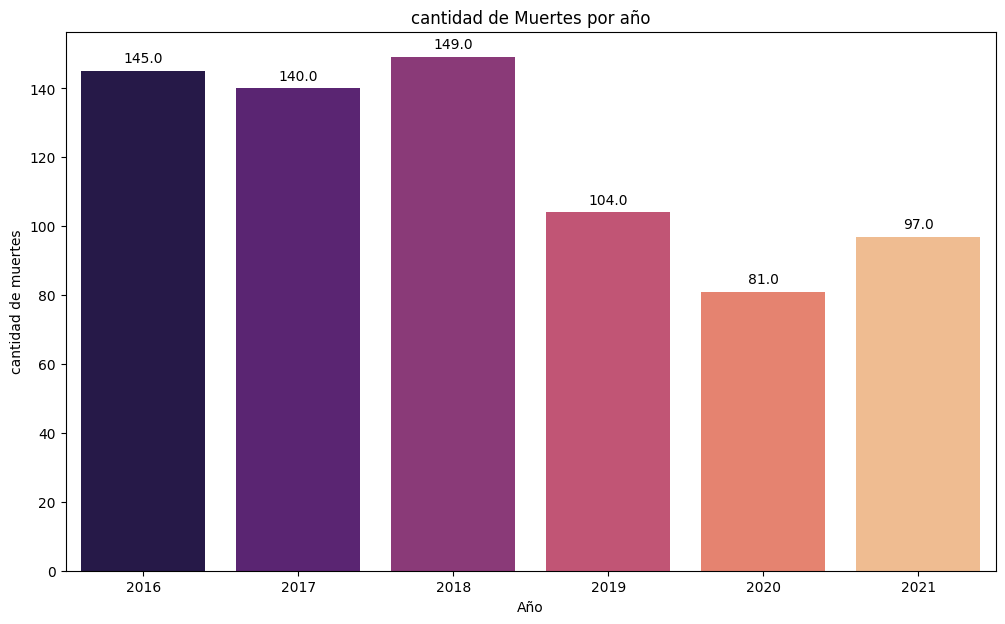

In [13]:
plt.figure(figsize=(12, 7))
plt.title('cantidad de Muertes por año')
plt.ylabel('cantidad de muertes')
ax = sns.barplot(x='Año', y='N_victimas', data=victimas_por_año, palette='magma')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.show()

In [14]:
victimas_por_mes = hechos[['N_victimas','Año','Mes']]
victimas_por_mes = victimas_por_mes.groupby(['Año','Mes']).sum().reset_index()
victimas_por_mes

,Año,Mes,N_victimas
0,2016,1,8
1,2016,2,12
2,2016,3,13
3,2016,4,11
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8


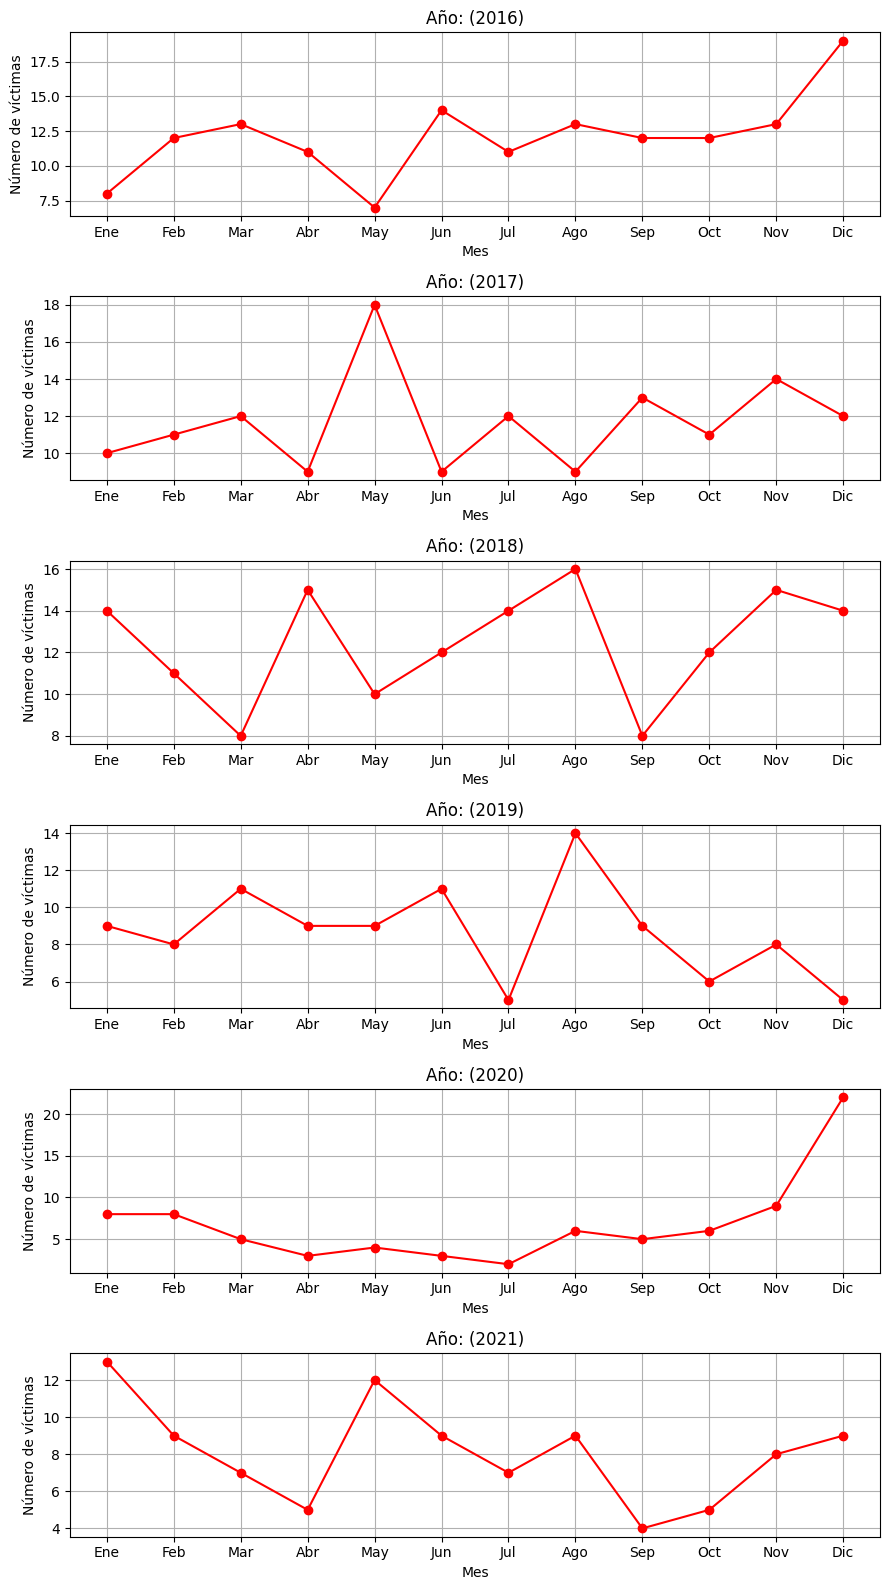

In [67]:
anios = victimas_por_mes['Año'].unique()  # Puedes agregar más años a esta lista

# Crear una figura con subplots para cada año
fig, axes = plt.subplots(len(anios), 1, figsize=(9, 16))  # Ajustar el tamaño según sea necesario

# Recorrer cada año y crear un gráfico lineplot en su subplot correspondiente
for i, anio in enumerate(anios):
    datos_anio = victimas_por_mes[victimas_por_mes["Año"] == anio]  # Filtrar datos por año
    ax = axes[i]  # Obtener el subplot actual

    # Crear el lineplot
    ax.plot(datos_anio["Mes"], datos_anio["N_victimas"], label=str(anio), marker='o', color='red')

    # Se agregan algunas etiquetas para identificar los puntos, los X e Y y el titulo
    ax.set_title(f"Año: ({anio})")
    ax.set_xlabel("Mes")
    ax.set_ylabel("Número de víctimas")
    #cantidad de divisiones que quiero tener en Mes
    ax.set_xticks(range(1, 13))
    #etiquetas en las divisiones con los nombres de los meses para mayor comprension
    ax.set_xticklabels(["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
    ax.grid(True)

# Ajustar el layout de los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

+ un dato de gran relevancia es el numero de victimas por mes que supera a todo el resto en el año 2020, cuando se vuelve a disparar la cantidad de muertes en diciembre, dando el numero de victimas fatales mas grande.
+ por otro lado, a excepcion del 2018 marzo y abril suelen tener una reduccion de accidentes fatales

In [17]:
victimas_por_dia = hechos[['N_victimas','Fecha','Año']]
victimas_por_dia['Fecha'] = victimas_por_dia['Fecha'].dt.day_name()
victimas_por_dia.rename(columns={'Fecha':'Dia'},inplace=True)
victimas_por_dia = victimas_por_dia.groupby(['Año','Dia']).sum().reset_index()

In [19]:
#utilizamos un diccionario para llamar en el replace y hacer la traduccion de los dias al español
dias_ingles_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
victimas_por_dia['Dia'] = victimas_por_dia['Dia'].replace(dias_ingles_espanol)
victimas_por_dia.head(7)

,Año,Dia,N_victimas
0,2016,Viernes,18
1,2016,Lunes,22
2,2016,Sábado,22
3,2016,Domingo,30
4,2016,Jueves,10
5,2016,Martes,16
6,2016,Miércoles,27


In [20]:
dias_orden = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
victimas_por_dia['Dia'] = pd.Categorical(victimas_por_dia['Dia'], categories=dias_orden, ordered=True)
victimas_por_dia = victimas_por_dia.sort_values(by=['Dia','Año']).reset_index(drop=True)

en este caso quiero utilizar barras agrupadas por año para chequear si existe algun patron entre los dias de semana y los fines

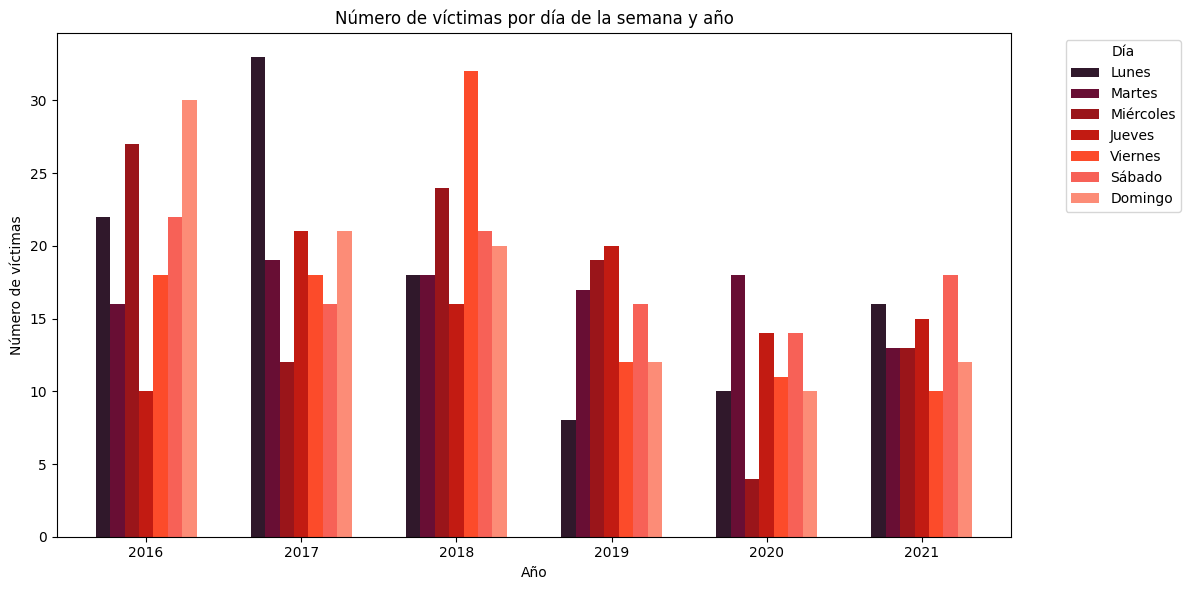

In [31]:
# Crear una tabla pivote para la representación gráfica
pivot_table = victimas_por_dia.pivot(index='Año', columns='Dia', values='N_victimas')

colors = ['#30182b', '#680e34', '#9a151a', '#c21b12', '#fc4b2a', '#f76157', '#fc8c77']

# Crear el gráfico de barras agrupadas
pivot_table.plot(kind='bar', figsize=(12, 6), width=0.65,color=colors)


# Añadir título y etiquetas
plt.title('Número de víctimas por día de la semana y año')
plt.xlabel('Año')
plt.ylabel('Número de víctimas')
plt.xticks(rotation=0)

# Añadir la leyenda
plt.legend(title='Día', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [35]:
total_dias = victimas_por_dia[['Dia', 'N_victimas']]
total_dias = total_dias.groupby('Dia').sum().reset_index()
total_dias

,Dia,N_victimas
0,Lunes,107
1,Martes,101
2,Miércoles,99
3,Jueves,96
4,Viernes,101
5,Sábado,107
6,Domingo,105


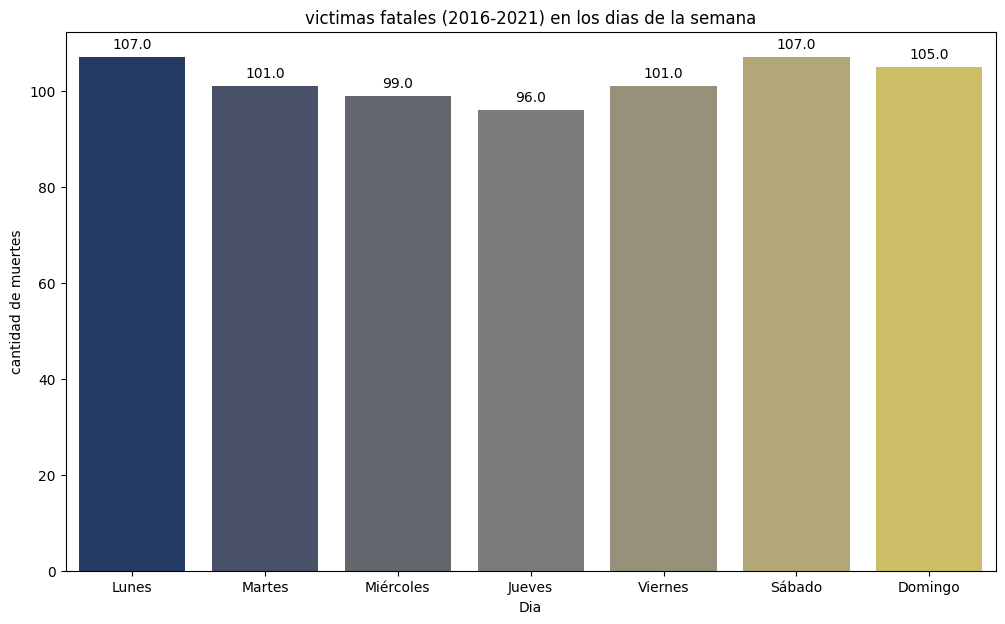

In [66]:
plt.figure(figsize=(12, 7))
plt.title('victimas fatales (2016-2021) en los dias de la semana')
plt.ylabel('cantidad de muertes')
ax = sns.barplot(x='Dia', y='N_victimas', data=total_dias, palette='cividis')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.show()